# Dataset Exploration

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

%matplotlib inline


## symbols_valid_meta.csv (Given Dataset)

### 1. Load Stock Data CSV

In [29]:
df = pd.read_csv('../../data/symbols_valid_meta.csv')
df.head()  # Show the first 5 rows

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N


### 2. Understand the Structure

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nasdaq Traded     8049 non-null   object 
 1   Symbol            8049 non-null   object 
 2   Security Name     8049 non-null   object 
 3   Listing Exchange  8049 non-null   object 
 4   Market Category   8049 non-null   object 
 5   ETF               8049 non-null   object 
 6   Round Lot Size    8049 non-null   float64
 7   Test Issue        8049 non-null   object 
 8   Financial Status  3383 non-null   object 
 9   CQS Symbol        4666 non-null   object 
 10  NASDAQ Symbol     8049 non-null   object 
 11  NextShares        8049 non-null   object 
dtypes: float64(1), object(11)
memory usage: 754.7+ KB


### 3. List the Columns

In [31]:
df.columns.tolist()


['Nasdaq Traded',
 'Symbol',
 'Security Name',
 'Listing Exchange',
 'Market Category',
 'ETF',
 'Round Lot Size',
 'Test Issue',
 'Financial Status',
 'CQS Symbol',
 'NASDAQ Symbol',
 'NextShares']

### 4. Check For Missing Data

In [32]:
df.isnull().sum()


Nasdaq Traded          0
Symbol                 0
Security Name          0
Listing Exchange       0
Market Category        0
ETF                    0
Round Lot Size         0
Test Issue             0
Financial Status    4666
CQS Symbol          3383
NASDAQ Symbol          0
NextShares             0
dtype: int64

## NASDAQ Historic Data from Yahoo Finance

### 1. Download Historical Stock Data 

In [34]:
ticker = 'AAPL'  # You can change this to any NASDAQ ticker
yf_df = yf.download(ticker, start='2018-01-01', end='2024-01-01')
yf_df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.479832,40.489233,39.774854,39.986349,102223600
2018-01-03,40.472790,41.017975,40.409344,40.543288,118071600
2018-01-04,40.660789,40.764187,40.437547,40.545642,89738400
2018-01-05,41.123707,41.210653,40.665472,40.757119,94640000
2018-01-08,40.970978,41.267067,40.872278,40.970978,82271200


### 2. Check Dataset Info

In [35]:
yf_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2018-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1509 non-null   float64
 1   (High, AAPL)    1509 non-null   float64
 2   (Low, AAPL)     1509 non-null   float64
 3   (Open, AAPL)    1509 non-null   float64
 4   (Volume, AAPL)  1509 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.7 KB


### 3. Set the Date Column as Index

In [36]:
yf_df.index = pd.to_datetime(df.index)


### 4. Check for Missing Data

In [37]:
yf_df.isnull().sum()


Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

### 5. Summary Stats (See min, max, mean, and standard deviation of prices)

In [38]:
yf_df.describe()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,108.193114,109.324611,106.948717,108.092817,1.073273e+08
std,51.108264,51.583687,50.578922,51.067150,5.513331e+07
min,33.915249,34.757226,33.869929,34.342199,2.404830e+07
25%,51.412640,52.218397,51.032326,51.550498,7.078370e+07
50%,120.876648,122.135017,119.372419,121.017918,9.296430e+07
75%,150.734482,152.492157,148.730080,150.559444,1.280440e+08
max,196.927689,198.428672,195.824294,196.838229,4.265100e+08


### 6. Plot Closing Price Over Time

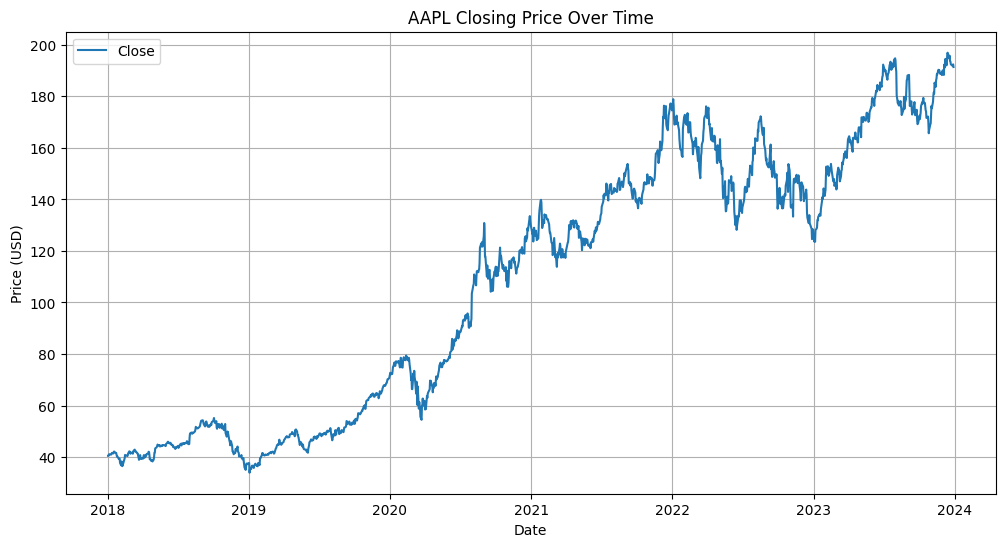

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close')
plt.title(f'{ticker} Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


### 7. Plot Volume Over Time

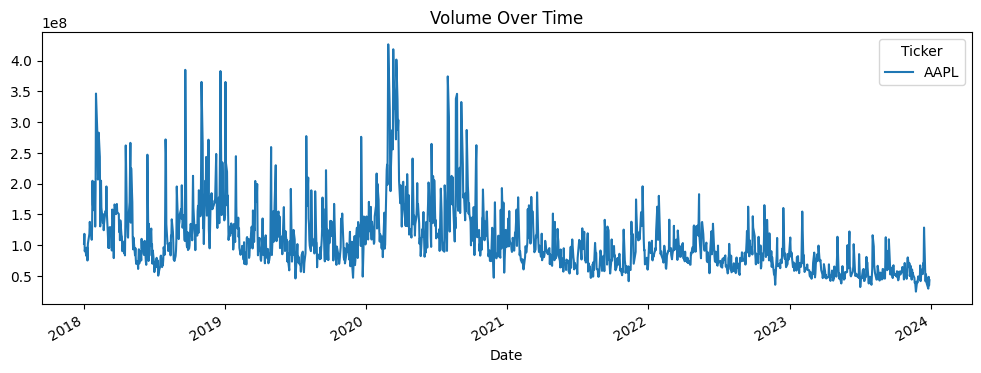

In [40]:
yf_df['Volume'].plot(figsize=(12,4), title='Volume Over Time')
plt.show()


### 8. Plot Closing Price Over Time

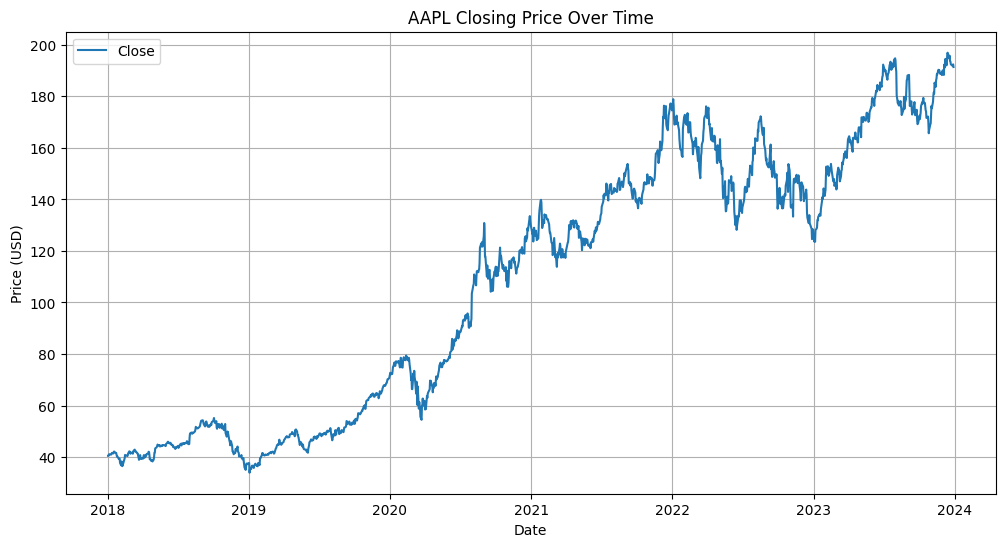

In [41]:
plt.figure(figsize=(12,6))
plt.plot(yf_df['Close'], label='Close')
plt.title(f'{ticker} Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


### 9. Add Moving Averages (Optional)

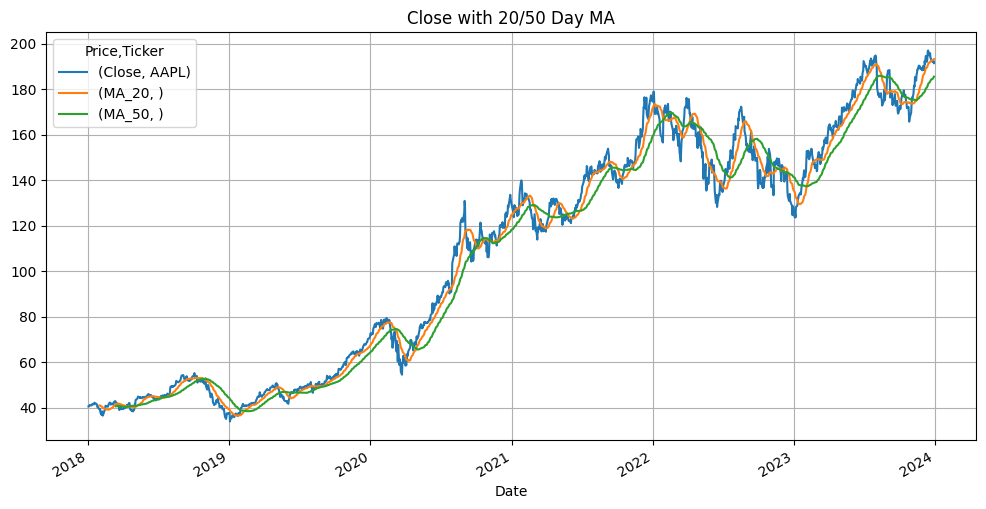

In [43]:
yf_df['MA_20'] = df['Close'].rolling(window=20).mean()
yf_df['MA_50'] = df['Close'].rolling(window=50).mean()

yf_df[['Close', 'MA_20', 'MA_50']].plot(figsize=(12,6), title='Close with 20/50 Day MA')
plt.grid(True)
plt.show()


### 10. Check Daily Returns 

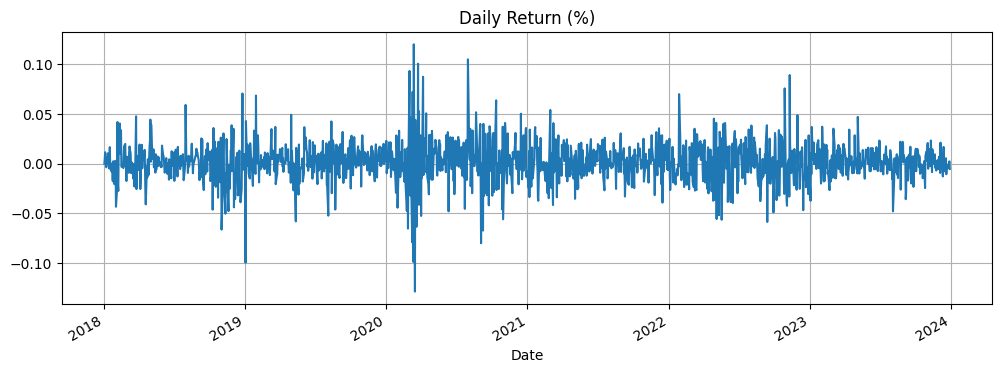

In [44]:
yf_df['Daily Return'] = df['Close'].pct_change()
yf_df['Daily Return'].plot(figsize=(12,4), title='Daily Return (%)')
plt.grid(True)
plt.show()


### 11. Save to CSV (Optional)

In [47]:
df.to_csv(f'../../data/individual_tickers/{ticker}_historic.csv')
